In [1]:
import os, re
import pandas as pd
import numpy as np
from konlpy.tag import Okt
okt=Okt()

In [2]:
PATH='/root/workspace/data/'
event=pd.read_csv(PATH+'reviewevent.csv', encoding='utf-8')

In [3]:
event

shop                                             notice  \
0    JH양동시장통닭-중랑점  1984년 처음 양동시장에서 장사를 시작하고나서\n2017년 아들내외와 같이 이곳 ...   
1       본초불닭발-면목점  👉OPEN기념 리뷰 이벤트👈\n소중한리뷰를 남겨주시는 고객님께 서비스 메뉴 택1 드...   
2         호치킨-전농점  ★ 신메뉴 / 빠다갈릭치킨 / 출시 기념 ‘ 빠삭꾸이포 ’ 증정 이벤트 (•ө•) ...   
3      석도명품닭갈비-본점  안녕하십니까 석도대표입니다\n저희매장은 닭으로 관련된 메뉴들로 구성되어 있는데요\n...   
4        청년육갑-고대점  56.7도의 마법 (수비드 삼겹살)\n\n배달 최초!!! 수비드(저온조리) 삼겹살을...   
..            ...                                                ...   
927      까로치아-용두점  ☜(ﾟヮﾟ☜)공지 사항 확인해주세요(☞ﾟヮﾟ)☞\n\n길이 빙판길라서 당분간 길음,...   
928         새서울청과  *상단에 있는 찜을 눌러주시고 바로결제 하신 분들에 한하여 서비스를 제공합니다.\n...   
929       CAFE153  ‼️요기요 익스프레스는 라이더 배정 후 저희가 주문 확인 가능합니다. 라이더가 배정...   
930       커피빈-장안점  안녕하세요.\n커피빈을 찾아주시는 고객님을 위해 '사진 리뷰 이벤트'를 진행합니다....   
931    탭플레이커피-중곡점  ◈맛있는 음료가 쏟아지는 탭플레이커피입니다◈\n\n■저희 탭플레이커피 중곡점은 깔끔...   

     isservice                                        reviewevent  
0        False                                                NaN  
1         True  \n👉OPEN기념 리뷰 이벤트👈\n소중한리뷰를 남겨주시는 고객님께 서비스 메뉴 택1...  
2         True  \n★ 신메뉴 / 빠다갈릭치킨 / 출시 기념 ‘ 빠삭꾸이포 ’ 증정 이벤트 (•ө•...  
3         True  \n■■■■리뷰이벤트■■■■\n이벤트 참여시 우동사리or치즈사리 서비스드립니다\n요...  
4         True  \n오픈 이벤트를 진행합니다!\n1. 3만원 이상 구매시 막국수 서비스!!\n4. ...  
..         ...                                                ...  
927      False                                                NaN  
928       True  \n*상단에 있는 찜을 눌러주시고 바로결제 하신 분들에 한하여 서비스를 제공합니다....  
929      False                                                NaN  
930       True  \n커피빈을 찾아주시는 고객님을 위해 '사진 리뷰 이벤트'를 진행합니다.\n이벤트에...  
931       True  \n■저희 탭플레이커피 중곡점은 깔끔한 위생/균형잡힌 맛/친절한 서비스! 이 3가지...  

[932 rows x 4 columns]

In [4]:
def extract_photo(sent):
    if sent != sent :
        return None
    extract=None
    sent_split=sent.split('\n')
    find=['사진','포토']
    for sent in sent_split:
        for word in find:
            if re.search(word,sent):
                if extract==None:
                    extract=sent
                else:
                    extract=extract+'\n'+sent
                break
    return extract
            

In [5]:
event['photo']=event.reviewevent.map(lambda x: extract_photo(x))

In [6]:
pd.set_option('display.max_colwidth', None)
event[event.photo.notnull()]

shop  \
1       본초불닭발-면목점   
2         호치킨-전농점   
9        치킨먹9회두먹9   
14        BHC-장안점   
19   멕시칸치킨-답십리장안점   
..            ...   
904           굿샌드   
910   봉명동내커피-경희대점   
914           은지세   
918     설빙-서울회기역점   
930       커피빈-장안점   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            notice  \
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             👉OPEN기념 리뷰 이벤트👈\n소중한리뷰를 남겨주시는 고객님께 서비스 메뉴 택1 드립니다\n\n1. 콜라500ml\n2. 사이다500ml\n3. 콘버터\n\n💕리뷰이벤트 참여 방법💕\n1⃣ 먼저 우리가게를 찜 ❤해주세요\n2⃣ 요청사항에 [리뷰참여 택1메뉴선택]\n3⃣ 맛있게 먹고 사진과 리뷰   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           ★ 신메뉴 / 빠다갈릭치킨 / 출시 기념 ‘ 빠삭꾸이포 ’ 증정 이벤트 (•ө•) ♡★ \n\n고소한 버터크림과 달다란 마늘의 부드러운 풍미, 마늘 바게트와 함께 즐기는 ★ 빠다갈릭치킨 ★ 출시~!! (짝짝짝)\n\n▶ 신메뉴 ＇빠다갈릭치킨‘ 주문하면, ‘ 빠삭꾸이포＇ 증정! (단, 내맘대로두마리 메뉴 제외)\n\n★ 서비스는 사랑입니다♡ ◟( ˘ ³˘)◞ ★\n- 치킨 단품 메뉴: 코카콜라 245ml 서비스\n- 치킨 SET 메뉴: 코카콜라 500ml 서비스\n\n★ 치즈볼 증정 리뷰이벤트 진행중!\n▶ 리뷰 이벤트 참여방법 ◀\n1. 단골가게 찜! ❤\n2. 바로결제 (만나서결제 고객님제외)\n3. 요청사항란에 ex)"사진 리뷰 약속” 남기면 끝!\n\n▶ 치킨과 치즈볼 맛있게 드셨다면 ★별★다★섯★개★와 함께 기분 좋은 리뷰! 꼭! 부탁드려요~ ❤\n‘바로결제’만 가능한 점 양해 부탁드립니다!\n\n★ 내 삶의 작은 변화, 1회용품 줄이기 ★ 나무젓가락은 기본제공이 되지 않습니다. 필요시 요청란에 남겨주세요~   
9                                                                                                                                                                                                                                                                                                                                             

In [7]:
pd.set_option('display.max_rows', None)
event.photo[event.photo.notnull()]

1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    3⃣ 맛있게 먹고 사진과 리뷰
2                                                                                                                                                                                                                                                                                                                                                 

In [8]:
def extract_star(sent):
    if sent != sent :
        return None
    extract=None
    sent_split=sent.split('\n')
    find=['별']
    for sent in sent_split:
        for word in find:
            if re.search(word,sent):
                if extract==None:
                    extract=sent
                else:
                    extract=extract+'\n'+sent
                break
    return extract

In [9]:
event['star']=event.reviewevent.map(lambda x: extract_star(x))

In [10]:
def extract_star2(sent):
    if sent != sent :
        return None
    
    
    extract=None
    sent_split=sent.split('\n')
    find=['별']
    for sent in sent_split:
        token=okt.morphs(sent)
        for word in find:
            if word in token:
                if extract==None:
                    extract=sent
                else:
                    extract=extract+'\n'+sent
                break
    return extract

In [11]:
event['star']=event.reviewevent.map(lambda x: extract_star2(x))

In [12]:
event.star[event.star.notnull()]

2                                                                                                                                                                                           ▶ 치킨과 치즈볼 맛있게 드셨다면 ★별★다★섯★개★와 함께 기분 좋은 리뷰! 꼭! 부탁드려요~ ❤
9                                                                                                                                                                                                                  ❤맛있게 드신 후 찜등록과 별5개 포토리뷰 부탁드립니다❤
11                                                                                                                                                                                                                  별⭐⭐⭐⭐⭐점과 찜❤꼭~눌러 주시는거 잊지마시구요.^^
12                                                                                                                                                                                                                           3. 별 ★★★★★ 리뷰 작성 약속 !
14                          

In [13]:
len(event.star[event.star.notnull()])

159

In [14]:
def extract_nickname(sent):
    if sent != sent :
        return None
    extract=None
    sent_split=sent.split('\n')
    find=['닉네임','아이디']
    for sent in sent_split:
        for word in find:
            if re.search(word,sent):
                if extract==None:
                    extract=sent
                else:
                    extract=extract+'\n'+sent
                break
    return extract

In [15]:
event['nickname']=event.reviewevent.map(lambda x: extract_nickname(x))

In [16]:
len(event.nickname[event.nickname.notnull()])

147

In [17]:
def extract_jimm(sent):
    if sent != sent :
        return None
    
    extract=None
    sent_split=sent.split('\n')
    find=['찜']
    findx=['계란찜','갈비찜','아구찜','해물찜','찜닭','찜탕','두찜','행찜','뼈다귀찜']
    for sent in sent_split:
        if re.search(find[0],sent):
            cnt=0
            for word in findx:
                if re.search(word,sent):
                    break
            else:
                if extract==None:
                    extract=sent
                else:
                    extract=extract+'\n'+sent
    return extract

In [18]:
event['jimm']=event.reviewevent.map(lambda x: extract_jimm(x))

In [19]:
len(event.jimm[event['jimm'].notnull()])

222

In [20]:
event.head()

shop  \
0  JH양동시장통닭-중랑점   
1     본초불닭발-면목점   
2       호치킨-전농점   
3    석도명품닭갈비-본점   
4      청년육갑-고대점   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   notice  \
0                                                                                    1984년 처음 양동시장에서 장사를 시작하고나서\n2017년 아들내외와 같이 이곳 중화동에 올라왔읍니다.\n제가 여기 서울에 올라오니 이쪽 음식은 짜고 자극적인 것들이 많읍니다.\n저희 음식은 자극적이지 않고 기본에 충실한 음식들입니다.\n그래서 아직도 많은 손님들이 찾아주시지 않나 싶읍니다.\n닭은 제 아들이 매일 아침에 트럭을 몰고 양계장에서 직접 사오고 있으며,\n상태가 안좋은 닭은 제가 매일 확인해서 폐기처분하고 있읍니다.\n모든 소스는 제가 직접 만들고 있읍니다. 다른곳에서 찾기 힘든 특별한 소스이니 먹어보시면 좋을겁니다.\n지금도 그때의 단골손님들이 기억하시고 이따금 저를 찾아오시곤 합니다. 자제분들의 자제분들도 저희 음식을 먹고 있읍니다.\n최근 손녀가 태어났읍니다. 제 손녀한테도 안심하고 먹일수 있는 음식을 만들겠읍니다.\n늘 소통하겠읍니다.\n감사합니다.   
1                                                                                                                                                                                                                                                                                                                                                                    👉OPEN기념 리뷰 이벤트👈\n소중한리뷰를 남겨주시는 고객님께 서비스 메뉴 택1 드립니다\n\n1. 콜라500ml\n2. 사이다500ml\n3. 콘버터\n\n💕리뷰이벤트 참여 방법💕\n1⃣ 먼저 우리가게를 찜 ❤해주세요\n2⃣ 요청사항에 [리뷰참여 택1메뉴선택]\n3⃣ 맛있게 먹고 사진과 리뷰   
2  ★ 신메뉴 / 빠다갈릭치킨 / 출시 기념 ‘ 빠삭꾸이포 ’ 증정 이벤트 (•ө•) ♡★ \n\n고소한 버터크림과 달다란 마늘의 부드러운 풍미, 마늘 바게트와 함께 즐기는 ★ 빠다갈릭치킨 ★ 출시~!! (짝짝짝)\n\n▶ 신메뉴 ＇빠다갈릭치킨‘ 주문하면, ‘ 빠삭꾸이포＇ 증정! (단, 내맘대로두마리 메뉴 제외)\n\n★ 서비스는 사랑입니다♡ ◟( ˘ ³˘)◞ ★\n- 치킨 단품 메뉴: 코카콜라 245ml 서비스\n- 치킨 SET 메뉴: 코카콜라 500ml 서비스\n\n★ 치즈볼 증정 리뷰이벤트 진행중!\n▶ 리뷰 이벤트 참여방법 ◀\n1. 단골가게 찜! ❤\n2. 바로결제 (만나서결제 고객님제외)\n3. 요청사항란에 ex)"사진 리뷰 약속” 남기면 끝!\n\n▶ 치킨과 치즈볼 맛있게 드셨다면 ★별★다★섯★개★와 함께 기분 좋은 리뷰! 꼭! 부탁드려요~ ❤\n‘바로결제’만 가능한 점 양해 부탁드립니다!\n\n★ 내 삶의 작은 변화, 1회용품 줄이기 ★ 나무젓가락은 기본제공이 되지 않습니다. 필요시 요청란에 남겨주세요~   
3                                                                                                                                                                                                                                                       안녕하십니까 석도대표입니다\n저희매장은 닭으로 관련된 메뉴들로 구성되어 있는데요\n이는 제가 15년째 현역 닭유통 사업을 같이하기 때문입니다 무엇보다 제가 자신있는 분야로 소비자분들께서 보다좋은재료로 가족.지인.친구들과 건강한 식사대접을 위해 노력하겠습니다\n최고보단 최선을 다하겠습니다\n\n■■■■리뷰이벤트■■■■\n이벤트 참여시 우동사리or치즈사리 서비스드립니다\n요청사항란에 리뷰이벤트 참여합니다 적어주시고\n필요하신 사리 택해서 적어주시면 됩니다\n많은 관심부탁드립니다 감사합니다   
4                                                                                                                                                                                                                                                   56.7도의 마법 (수비드 삼겹살)\n\n배달 최초!!! 수비드(저온조리) 삼겹살을 배달해드립니다\n\n72시간 워터에이징과 48시간 드라이에이징으로 최상의 고기 품질을 만듭니다.\n5년 동안 고기집을 운영하면서 생긴 노하우로 고기를 연구했습니다.\n\n오픈 이벤트를 진행합니다!\n1. 3만원 이상 구매시 막국수 서비스!!\n4. 모든 구매 주문 고객 휴대용 소독용품 증정!!\n\n고대 공유주방에 입점하여 오프라인 매장을 동시에 운영중이며\n오픈 주방 특성상 위생에 철저히 신경쓰고 있습니다.   

   isservice  \
0      False   
1       True   
2       True   
3       True   
4       True   

                                                                                                                                                                                                                                                                                                                                                                                                                                                  reviewevent  \
0                                                                                                                                                                                                      

In [21]:
#event.to_csv(PATH+'category.csv')

In [22]:
def change(x):
    if x==None :
        return False
    else:
        return True
    

In [23]:
event['photo_t']=event.photo.map(lambda x: change(x))
event['star_t']=event.star.map(lambda x: change(x))


In [24]:
event['nickname_t']=event.nickname.map(lambda x: change(x))
event['jimm_t']=event.jimm.map(lambda x: change(x))

In [25]:
event.jimm[event['jimm'].notnull()]

1                                                                                                                                                                                                                                   1⃣ 먼저 우리가게를 찜 ❤해주세요
2                                                                                                                                                                                                                                          1. 단골가게 찜! ❤
9                                                                                                                                                                                                                       ❤맛있게 드신 후 찜등록과 별5개 포토리뷰 부탁드립니다❤
11                                                                                                                                                                                                                       별⭐⭐⭐⭐⭐점과 찜❤꼭~눌러 주시는거 잊지마시구요.^^
12      

In [26]:
event_t=event.iloc[:,[0,1,2,3,8,9,10,11]]

In [27]:
#event_t.to_csv(PATH+'category_t.csv')

In [28]:
def extract_jimm2(sent):
    if sent != sent :
        return None
    
    extract=None
    sent_split=sent.split('\n')
    find=['찜']
    for sent in sent_split:
        if re.search(find[0],sent):
            clean_sent=re.sub('[^가-힣]',' ',sent)
            if '찜'in okt.morphs(clean_sent):
                if extract==None:
                    extract=sent
                else:
                    extract=extract+'\n'+sent
        
    return extract

In [29]:
event_t

shop  \
0             JH양동시장통닭-중랑점   
1                본초불닭발-면목점   
2                  호치킨-전농점   
3               석도명품닭갈비-본점   
4                 청년육갑-고대점   
5            온가족행복닭강정-답십리점   
6                멕시카나-청량리점   
7                네네치킨-청량리점   
8              짱닭치킨-서울시립대점   
9                 치킨먹9회두먹9   
10             걸작떡볶이치킨-외대점   
11                  국방부닭강정   
12                푸라닭-경희대점   
13                     무치킨   
14                 BHC-장안점   
15                 파이팅치킨호프   
16                모던통닭-장안점   
17              오늘통닭-도봉구청점   
18         1인치즈닭떡볶이&닭갈비전문점   
19            멕시칸치킨-답십리장안점   
20                바른치킨-전농점   
21            처갓집양념치킨-왕십리점   
22                  오떡-전농점   
23                   석도-본점   
24          호식이두마리치킨-장안1호점   
25           호식이두마리치킨-답십리점   
26          직화반상by셰플리(동대문)   
27               순수치킨-답십리점   
28               페리카나-청량리점   
29               바사칸동네치킨맛집   
30                 60계-장안점   
31            오븐마루-답십리로데오점   
32                BHC-시립대점   
33               후라인생맛집-본점   
34          성식이네매운닭발(직화구이)   
35           임영웅의티바두마리-장안점   
36            1번지통닭-장안데시앙점   
37                 59년옛날통닭   
38             사랑한닭-사가정시장점   
39            호식이두마리치킨-회기점   
40             지코바치킨-면목1호점   
41                BHC-청량리점   
42               치킨플러스-외대점   
43          바사칸동네치킨-동대문1호점   
44                 BHC-회기점   
45              양계장집아들-용답점   
46             멕시카나-장안답십리점   
47         꾸브라꼬숯불두마리치킨-장안점   
48                순수치킨-회기점   
49                   바사칸치킨   
50                 BHC-휘경점   
51                 푸라닭-면목점   
52               노랑통닭-경희대점   
53                국민닭발-회기점   
54           지코바치킨-서울용두1호점   
55              호치킨-장안데시앙점   
56           걸작떡볶이치킨-서울중화점   
57               썬더치킨-경희대점   
58                   치킨트리플   
59                자담치킨-이문점   
60             호치킨-답십리사거리점   
61          꼬꼬스토리수제닭강정-장안점   
62                호치킨-한양대점   
63            처갓집양념치킨-경희대점   
64           동대문구가장맛있는석도치킨   
65               치요남치킨-장안점   
66               부어치킨-장안동점   
67               꼬꼬누리-답심리점   
68         만복치킨1810-고대안암본점   
69              치킨뱅이-장안평본점   
70            호식이두마리치킨-전농점   
71             처갓집양념치킨-제기점   
72                짱닭치킨-회기점   
73             지코바치킨-장안1호점   
74                청춘연가퓨전포차   
75               치킨마루-청량리점   
76                   봉계닭강정   
77               푸라닭-장안2호점   
78           이쉐프의분식왕-동대문본점   
79        코리엔탈깻잎두마리치킨-답십리점   
80                짱닭치킨-휘경점   
81                 60계-전농점   
82         숯불두마리치킨꾸브라꼬-장안점   
83               네네치킨-휘경1점   
84            명픔크리스피치킨-회기점   
85                짱닭치킨-석관점   
86         골라먹는짱닭치킨-장안답십리점   
87              미쳐버린파닭-고대점   
88          임영웅의티바두마리-답십리점   
89             처갓집양념치킨-이문점   
90           호식이두마리치킨-청량리점   
91                 BBQ-전농점   
92                 바사칸인생치킨   
93               맛닭꼬-동부시장점   
94              석도치즈닭갈비전문점   
95                돈치킨-장안본점   
96               후아바베큐-6호점   
97                   행복닭강정   
98             또래오래-동대문장안점   
99                양계장집아들닭발   
100               짱닭치킨-외대점   
101                CF숯불바베큐   
102            처갓집양념치킨-장안점   
103               네네치킨-전농점   
104            또봉이통닭-서울회기점   
105               노랑통닭-장안점   
106              수원명물행복닭강정   
107                   크치치킨   
108             후라인생맛집-중랑점   
109               푸라닭-답십리점   
110           지코바치킨-서울청량리점   
111             치킨더홈-서울이문점   
112            타이인플레이트-회기점   
113                 피자빨간고추   
114           로이앤벨라파스타&리조또   
115        화덕피자전문뚜띠쿠치나-용두점   
116              7번가피자-장안점   
117        1인파스타전문점GoodGod   
118                   수퍼보울   
119            빅스타피자-서울안암점   
120            스탠딩스테이크-장안점   
121               또먹고싶다-본점   
122              369피자-면목점   
123              비나레스토랑-본점   
124             폭립하우스-시립대점   
125   한국에서즐기는뉴욕의맛ASAPPIZZA   
126          동대문구ASAPPIZZA   
127            바푸리포쌀국수 장안점   
128               피자탑-장안동점   
129            딜리셔스피자-답십리점   
130              미스터피자-전농점   
131              KFC-한국외대점   
132             미태리-전농로터리점   
13

In [30]:
def delete(isservice,t):
    if isservice:
        return t
    else:
        return None

In [31]:
def catagory(photo,star,nickname,jimm):
    cnt=0
    if photo:
        cnt=cnt+1
    if star:
        cnt=cnt+2
    if nickname:
        cnt+=4
    if jimm:
        cnt+=8
    
    return cnt
    

In [32]:
event_t['catagory']=event_t.apply(lambda x:catagory(x['photo_t'],x['star_t'],x['nickname_t'],x['jimm_t']),axis=1)

<ipython-input-32-8ff20db5472b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_t['catagory']=event_t.apply(lambda x:catagory(x['photo_t'],x['star_t'],x['nickname_t'],x['jimm_t']),axis=1)


In [33]:
event_t['catagory']=event_t.apply(lambda x: delete(x['isservice'],x['catagory']),axis=1)

<ipython-input-33-2c9deff6e4ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_t['catagory']=event_t.apply(lambda x: delete(x['isservice'],x['catagory']),axis=1)


In [34]:
event_t

shop  \
0             JH양동시장통닭-중랑점   
1                본초불닭발-면목점   
2                  호치킨-전농점   
3               석도명품닭갈비-본점   
4                 청년육갑-고대점   
5            온가족행복닭강정-답십리점   
6                멕시카나-청량리점   
7                네네치킨-청량리점   
8              짱닭치킨-서울시립대점   
9                 치킨먹9회두먹9   
10             걸작떡볶이치킨-외대점   
11                  국방부닭강정   
12                푸라닭-경희대점   
13                     무치킨   
14                 BHC-장안점   
15                 파이팅치킨호프   
16                모던통닭-장안점   
17              오늘통닭-도봉구청점   
18         1인치즈닭떡볶이&닭갈비전문점   
19            멕시칸치킨-답십리장안점   
20                바른치킨-전농점   
21            처갓집양념치킨-왕십리점   
22                  오떡-전농점   
23                   석도-본점   
24          호식이두마리치킨-장안1호점   
25           호식이두마리치킨-답십리점   
26          직화반상by셰플리(동대문)   
27               순수치킨-답십리점   
28               페리카나-청량리점   
29               바사칸동네치킨맛집   
30                 60계-장안점   
31            오븐마루-답십리로데오점   
32                BHC-시립대점   
33               후라인생맛집-본점   
34          성식이네매운닭발(직화구이)   
35           임영웅의티바두마리-장안점   
36            1번지통닭-장안데시앙점   
37                 59년옛날통닭   
38             사랑한닭-사가정시장점   
39            호식이두마리치킨-회기점   
40             지코바치킨-면목1호점   
41                BHC-청량리점   
42               치킨플러스-외대점   
43          바사칸동네치킨-동대문1호점   
44                 BHC-회기점   
45              양계장집아들-용답점   
46             멕시카나-장안답십리점   
47         꾸브라꼬숯불두마리치킨-장안점   
48                순수치킨-회기점   
49                   바사칸치킨   
50                 BHC-휘경점   
51                 푸라닭-면목점   
52               노랑통닭-경희대점   
53                국민닭발-회기점   
54           지코바치킨-서울용두1호점   
55              호치킨-장안데시앙점   
56           걸작떡볶이치킨-서울중화점   
57               썬더치킨-경희대점   
58                   치킨트리플   
59                자담치킨-이문점   
60             호치킨-답십리사거리점   
61          꼬꼬스토리수제닭강정-장안점   
62                호치킨-한양대점   
63            처갓집양념치킨-경희대점   
64           동대문구가장맛있는석도치킨   
65               치요남치킨-장안점   
66               부어치킨-장안동점   
67               꼬꼬누리-답심리점   
68         만복치킨1810-고대안암본점   
69              치킨뱅이-장안평본점   
70            호식이두마리치킨-전농점   
71             처갓집양념치킨-제기점   
72                짱닭치킨-회기점   
73             지코바치킨-장안1호점   
74                청춘연가퓨전포차   
75               치킨마루-청량리점   
76                   봉계닭강정   
77               푸라닭-장안2호점   
78           이쉐프의분식왕-동대문본점   
79        코리엔탈깻잎두마리치킨-답십리점   
80                짱닭치킨-휘경점   
81                 60계-전농점   
82         숯불두마리치킨꾸브라꼬-장안점   
83               네네치킨-휘경1점   
84            명픔크리스피치킨-회기점   
85                짱닭치킨-석관점   
86         골라먹는짱닭치킨-장안답십리점   
87              미쳐버린파닭-고대점   
88          임영웅의티바두마리-답십리점   
89             처갓집양념치킨-이문점   
90           호식이두마리치킨-청량리점   
91                 BBQ-전농점   
92                 바사칸인생치킨   
93               맛닭꼬-동부시장점   
94              석도치즈닭갈비전문점   
95                돈치킨-장안본점   
96               후아바베큐-6호점   
97                   행복닭강정   
98             또래오래-동대문장안점   
99                양계장집아들닭발   
100               짱닭치킨-외대점   
101                CF숯불바베큐   
102            처갓집양념치킨-장안점   
103               네네치킨-전농점   
104            또봉이통닭-서울회기점   
105               노랑통닭-장안점   
106              수원명물행복닭강정   
107                   크치치킨   
108             후라인생맛집-중랑점   
109               푸라닭-답십리점   
110           지코바치킨-서울청량리점   
111             치킨더홈-서울이문점   
112            타이인플레이트-회기점   
113                 피자빨간고추   
114           로이앤벨라파스타&리조또   
115        화덕피자전문뚜띠쿠치나-용두점   
116              7번가피자-장안점   
117        1인파스타전문점GoodGod   
118                   수퍼보울   
119            빅스타피자-서울안암점   
120            스탠딩스테이크-장안점   
121               또먹고싶다-본점   
122              369피자-면목점   
123              비나레스토랑-본점   
124             폭립하우스-시립대점   
125   한국에서즐기는뉴욕의맛ASAPPIZZA   
126          동대문구ASAPPIZZA   
127            바푸리포쌀국수 장안점   
128               피자탑-장안동점   
129            딜리셔스피자-답십리점   
130              미스터피자-전농점   
131              KFC-한국외대점   
132             미태리-전농로터리점   
13

In [35]:
event_t.groupby('catagory').count().iloc[:,1]

catagory
0.0     176
1.0      27
2.0      21
3.0      13
4.0      44
5.0       8
6.0       6
7.0      16
8.0      60
9.0      24
10.0     23
11.0     42
12.0     19
13.0     16
14.0     16
15.0     22
Name: notice, dtype: int64

<AxesSubplot:>

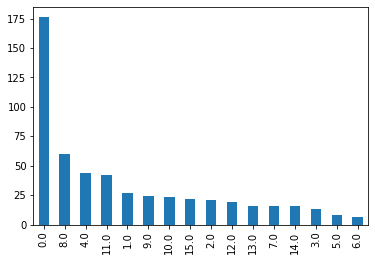

In [36]:
event_t.catagory.value_counts(sort=True).plot(kind='bar')

In [37]:
catagory2=event_t[['shop','catagory']]

In [38]:
#catagory2.to_csv(PATH+'catagory2.csv',index=False)

In [39]:
event_t.dropna(inplace=True)

<ipython-input-39-a624fbc2a718>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_t.dropna(inplace=True)


In [40]:
event_t.photo_t.value_counts()

False    365
True     168
Name: photo_t, dtype: int64

In [41]:
event_t.star_t.value_counts()

False    374
True     159
Name: star_t, dtype: int64

In [42]:
event_t.nickname_t.value_counts()

False    386
True     147
Name: nickname_t, dtype: int64

In [43]:
event_t.jimm_t.value_counts()

False    311
True     222
Name: jimm_t, dtype: int64

In [45]:
event_t.to_csv(PATH+'iscatagory.csv', index=False)

In [55]:
catagory2.catagory.map(lambda x: -1 if x !=x else x )

0      -1.0
1       9.0
2      11.0
3       0.0
4       0.0
5      -1.0
6      -1.0
7      -1.0
8       0.0
9      11.0
10      0.0
11     10.0
12     10.0
13      4.0
14     11.0
15     -1.0
16     -1.0
17     -1.0
18      0.0
19      9.0
20     -1.0
21      5.0
22     14.0
23      0.0
24      8.0
25     10.0
26     -1.0
27      4.0
28      0.0
29      8.0
30     -1.0
31      0.0
32      0.0
33      0.0
34     -1.0
35     -1.0
36     -1.0
37     -1.0
38     -1.0
39      0.0
40      9.0
41     12.0
42      0.0
43      8.0
44     10.0
45      7.0
46      1.0
47      0.0
48     12.0
49      8.0
50     10.0
51     15.0
52     -1.0
53      4.0
54     10.0
55     11.0
56      8.0
57      6.0
58      0.0
59     -1.0
60     11.0
61      0.0
62     11.0
63      0.0
64      0.0
65     -1.0
66      0.0
67     15.0
68      8.0
69      8.0
70      1.0
71      0.0
72      0.0
73     15.0
74     -1.0
75      4.0
76     -1.0
77     15.0
78      0.0
79      0.0
80      0.0
81     -1.0
82      0.0
83  

In [57]:
catagory2.catagory=catagory2.catagory.map(lambda x: -1 if x !=x else x )

/root/miniconda/lib/python3.8/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [58]:
#catagory2.to_csv(PATH+'catagory2.csv',index=False)